# Outlier Removal Using the Interquartile Range (IQR)

This notebook show how to remove outliers from a dataset using the **Interquartile Range (IQR)** method. This is a statistical technique that is effective even when the data is not normally distributed.

**Key Concepts:**
- **Interquartile Range (IQR):** The range between the 25th and 75th percentiles ($IQR = Q3 - Q1$). It represents the middle 50% of the data.

## Example 1: Heights Dataset

I will use a simple dataset of human heights to illustrate the IQR method. First, I'll load the data and use the `.describe()` function to get a quick statistical summary.

In [24]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [15]:
CSV_PATH = "data/heights.csv"
df = pd.read_csv(CSV_PATH)
df.sample(5)

,name,height
0,mohan,5.9
5,khusbu,5.4
9,imran,14.5
13,binod,5.5
7,selena,6.5


In [28]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Step 1: Calculate the Interquartile Range (IQR)

The first step is to find the IQR. I can use the 25th (Q1) and 75th (Q3) percentiles directly from `.describe()` output or calculate them using the `.quantile()` method.

In [19]:
q1 = df.height.quantile(.25)
q3 = df.height.quantile(.75)

print(f"Q1 (25th percentile): {q1: .2f}")
print(f"Q3 (75th percentile): {q3: .2f}")

# Calculate the Interquartile Range
iqr = q3 - q1
print(f'IQR: {iqr: .2f}')

Q1 (25th percentile):  5.25
Q3 (75th percentile):  6.17
IQR:  0.92


### Step 2: Determine the Outlier Boundaries

A common practice is to define outliers as any data point that falls outside the range of **1.5 times the IQR** below the first quartile or above the third quartile.

- **Upper Boundary Formula:** $Q3 + 1.5 \times IQR$
- **Lower Boundary Formula:** $Q1 - 1.5 \times IQR$

In [12]:
upper_lim = q3 + (1.5 * iqr)
lower_lim = q1 - (1.5 * iqr)

print(f"Upper limit: {upper_lim: .2f}")
print(f'Lower limit: {lower_lim: .2f}')

Upper limit:  7.56
Lower limit:  3.86


### Step 3: Identify and Remove the Outliers

Now I can use these boundaries to identify the outliers in the dataset. After identifying them, I create a new, clean DataFrame by filtering them out.

In [21]:
# show all outliers
print("Identified Outliers:")
df[(df.height < lower_lim) | 
   (df.height > upper_lim)]

Identified Outliers:


,name,height
9,imran,14.5
12,yoseph,1.2


In [22]:
df_filtered = df[(df.height > lower_lim) & 
                 (df.height < upper_lim)]

print("Sample from the filtered data:")
df_filtered.sample(5)

Sample from the filtered data:


,name,height
7,selena,6.5
10,jose,6.1
13,binod,5.5
1,maria,5.2
8,john,7.1


In [23]:
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (14, 2)
Filtered DataFrame shape: (12, 2)


## Example 2: Weight and Height Dataset

Now, I'll apply the IQR method to a larger dataset with multiple numerical columns. I'll analyze both the 'Height' and 'Weight' columns for outliers.

In [26]:
df = pd.read_csv('data/weight-height.csv')
print("Sample from the filtered data:")
df.sample(5)

Sample from the filtered data:


,Gender,Height,Weight
9936,Female,64.780420,137.922681
8788,Female,64.728390,147.519907
8338,Female,62.907630,141.216628
8285,Female,60.731857,119.967881
6798,Female,63.327304,144.273382


In [27]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Visualizing the Distributions

Plot histograms to help understand the spread of the 'Height' and 'Weight' columns before leaning.

<function matplotlib.pyplot.show(close=None, block=None)>

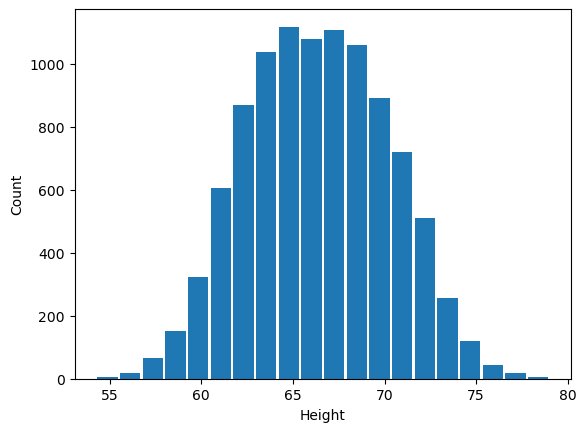

In [33]:
# Create a histogram to visualize the distribution of heights
plt.hist(df.Height, bins = 20, rwidth=0.9)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

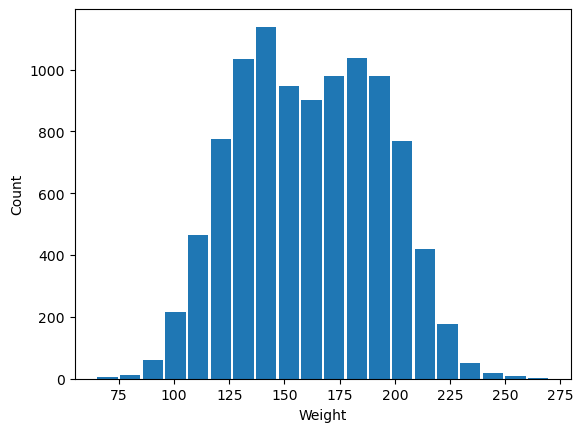

In [44]:
# Create a histogram to visualize the distribution of weights
plt.hist(df.Weight, bins = 20, rwidth=0.9)
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show

### Analyzing and Cleaning the 'Height' Column

First, I'll calculate the IQR and outlier boundaries specifically for the 'Height' column.

In [39]:
q1H = df.Height.quantile(.25)
q3H = df.Height.quantile(.75)

iqrH = q3H - q1H

print(f'Q1 (Height): {q1H: .2f}')
print(f'Q3 (Height): {q3H: .2f}')
print(f'IQR: {iqrH: .2f}')

Q1 (Height):  63.51
Q3 (Height):  69.17
IQR:  5.67


In [46]:
upper_limH = q3H + (1.5 * iqrH)
lower_limH = q1H - (1.5 * iqrH)

print("Height Outliers:")
df[(df.Height > upper_limH) |
   (df.Height < lower_limH)]

Height Outliers:


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


### Analyzing and Cleaning the 'Weight' Column

Next, I'll repeat the same process for the 'Weight' column.

In [43]:
q1W = df.Weight.quantile(.25)
q3W = df.Weight.quantile(.75)

iqrW = q3W - q1W

print(f'Q1 (Height): {q1W: .2f}')
print(f'Q3 (Height): {q3W: .2f}')
print(f'IQR: {iqrW: .2f}')

Q1 (Height):  135.82
Q3 (Height):  187.17
IQR:  51.35


In [45]:
upper_limW = q3W + (1.5 * iqrW)
lower_limW = q1W - (1.5 * iqrW)

print("Weight Outliers:")
df[(df.Weight > upper_limW) |
   (df.Weight < lower_limW)]

Weight Outliers:


,Gender,Height,Weight
2014,Male,78.998742,269.989699


### Creating the Final Cleaned Dataset

To get a fully clean dataset, I need to remove all rows that were identified as outliers in **either** the 'Height' **or** the 'Weight' column.

In [47]:
df_cleaned = df[
    (df.Height > lower_limH) & (df.Height < upper_limH) &
    (df.Weight > lower_limW) & (df.Weight < upper_limW)
]

# Display a sample from the final cleaned data
df_cleaned.sample(5)

,Gender,Height,Weight
4911,Male,70.555126,205.989402
5158,Female,64.981978,157.829152
7207,Female,63.768212,143.723794
9897,Female,60.718926,123.223480
8384,Female,64.453080,134.550509


In [48]:
# Compare the original and final shapes
print("Original DataFrame shape:", df.shape)
print("Final cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (10000, 3)
Final cleaned DataFrame shape: (9992, 3)
